### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Reading data

In [2]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Treating missing values

In [5]:
(df.isnull().sum()/len(df)).sort_values(ascending = False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

In [6]:
# Dropping columns with missing value >40%
df_drop = df.columns[(df.isnull().sum()/len(df)) >0.4]
df_drop

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [7]:
df.drop(columns = df_drop, inplace = True)

In [8]:
(df.isnull().sum()/len(df)).sort_values(ascending = False)

LotFrontage      0.177397
GarageFinish     0.055479
GarageType       0.055479
GarageCond       0.055479
GarageQual       0.055479
                   ...   
CentralAir       0.000000
HeatingQC        0.000000
Heating          0.000000
SaleCondition    0.000000
Id               0.000000
Length: 76, dtype: float64

In [9]:
# When Garage, Basement, MasVnr is not available in house avilable all the parameters related to them are mentioned as NA, So replacing them with relevant values
# 1 row is missing Electrical value. Replaced it with most commonly used 'SBrkr'

df['GarageFinish'].fillna('NoGarage',inplace = True)
df['GarageType'].fillna('NoGarage',inplace = True)
df['GarageCond'].fillna('NoGarage',inplace = True)
df['GarageQual'].fillna('NoGarage',inplace = True)
df['GarageYrBlt'].fillna('0',inplace = True)
df['BsmtFinType1'].fillna('NoBsmt',inplace = True)
df['BsmtCond'].fillna('NoBsmt',inplace = True)
df['BsmtQual'].fillna('NoBsmt',inplace = True)
df['BsmtExposure'].fillna('NoBsmt',inplace = True)
df['BsmtFinType2'].fillna('NoBsmt',inplace = True)
df['MasVnrType'].fillna('NoVnr',inplace = True)
df['MasVnrArea'].fillna('0',inplace = True)
df['Electrical'].fillna('SBrkr',inplace = True)

In [10]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
df['LotFrontage'].mode()

0    60.0
dtype: float64

In [12]:
df['LotFrontage'].median()

69.0

In [13]:
# LotFrontage has mean, median close to 70 and also mode is 60. So replacing it with mean
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [14]:
(df.isnull().sum()/len(df)).sort_values(ascending = False)

SalePrice       0.0
ExterCond       0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
               ... 
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
Id              0.0
Length: 76, dtype: float64

### Fixing Data Types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [16]:
#Deriving Age using Year columns
df['Building_Age'] = df['YrSold'] - df['YearBuilt']
df['Building_remodel_Age'] = df['YrSold'] - df['YearRemodAdd']

In [17]:
# Changing data tyoes
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['MasVnrArea'] = df['MasVnrArea'].astype('int64')
df['MoSold'] = df['MoSold'].astype('object')

In [18]:
categorical_cols = df.select_dtypes(include = 'object').columns
categorical_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
# Dropping columns which are not required for analysis

df.drop(['Id','GarageYrBlt','YrSold','YearBuilt','YearRemodAdd','Street'], axis = 1, inplace = True)
df.drop(['Utilities','LandSlope','Neighborhood','Condition2','RoofMatl'], axis = 1, inplace = True)
df.drop(['Exterior2nd','BsmtFinType2','Heating','Electrical','Functional','GarageQual'], axis = 1, inplace = True)
df.drop(['GarageCond','PavedDrive','MoSold'], axis = 1, inplace = True)

In [20]:
# Analysing categorical variables and replacing with relatable fields:

df['MSSubClass'].replace({20: '1Story_new', 60: '2story_new', 50:'others',120:'others',30:'others',160:'others',
                          70:'others',80:'others',90:'others',190:'others',85:'others',75:'others',45:'others',
                         180:'others',40:'others'},inplace = True)
df['LotShape'].replace({'IR1': 'IR','IR2': 'IR','IR3': 'IR'},inplace = True)
df['LotConfig'].replace({'CulDSac':'others','FR2': 'others', 'FR3': 'others' },inplace = True)
df['BldgType'].replace({'TwnhsE': 'others','Duplex': 'others','Twnhs': 'others','2fmCon': 'others'},inplace = True)
df['HouseStyle'].replace({'1.5Fin': 'others','SLvl': 'others','SFoyer': 'others','1.5Unf': 'others','2.5Unf':'others',
                         '2.5Fin': 'others'},inplace = True)
df['OverallQual'].replace({1: 'Poor',2: 'Poor',3: 'Poor',4: 'Avg',5: 'Avg',6: 'Avg',7: 'Good',8: 'Good',9: 'Good',
                          10:'Good'},inplace = True)
df['OverallCond'].replace({1: 'Poor',2: 'Poor',3: 'Poor',4: 'Avg',5: 'Avg',6: 'Avg',7: 'Good',8: 'Good',9: 'Good',
                          10:'Good'},inplace = True)
df['MSZoning'].replace({'FV': 'others','RH': 'others','C (all)': 'others'},inplace = True)
df['LandContour'].replace({'Bnk': 'No_Lvl','HLS': 'No_Lvl','Low': 'No_Lvl'},inplace = True)
df['Condition1'].replace({'Feedr': 'Not_Normal','Artery': 'Not_Normal','RRAn': 'Not_Normal','PosN': 'Not_Normal',
                          'RRAe':'Not_Normal','PosA':'Not_Normal', 'RRNn':'Not_Normal', 'RRNe':'Not_Normal'},inplace = True)
df['RoofStyle'].replace({'Flat': 'others','Gambrel': 'others','Mansard': 'others', 'Shed': 'others'},inplace = True)
df['Exterior1st'].replace({'Plywood': 'others','CemntBd': 'others','BrkFace': 'others','WdShing': 'others',
                          'Stucco':'others','AsbShng':'others', 'Stone':'others', 'BrkComm':'others',
                          'ImStucc':'others', 'AsphShn':'others', 'CBlock':'others'},inplace = True)
df['MasVnrType'].replace({'Stone': 'others','BrkCmn': 'others','NoVnr': 'None'},inplace = True)
df['Foundation'].replace({'Slab': 'others','Stone': 'others','Wood': 'others',},inplace = True)
df['GarageType'].replace({'BuiltIn': 'others','NoGarage': 'others','CarPort': 'others','Basment': 'others',
                          '2Types': 'others'},inplace = True)
df['SaleType'].replace({'New': 'others','COD': 'others','ConLD': 'others','ConLI': 'others',
                          'ConLw': 'others','CWD': 'others','Oth': 'others','Con': 'others'},inplace = True)
df['SaleCondition'].replace({'Partial': 'others','Abnorml': 'others','Family': 'others','Alloca': 'others',
                          'AdjLand': 'others'},inplace = True)

### Univariate/ Bivariate Analysis

In [21]:
numeric_cols = df.select_dtypes(include = ['float64', 'int64'])
numeric_cols.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'Building_Age', 'Building_remodel_Age'],
      dtype='object')

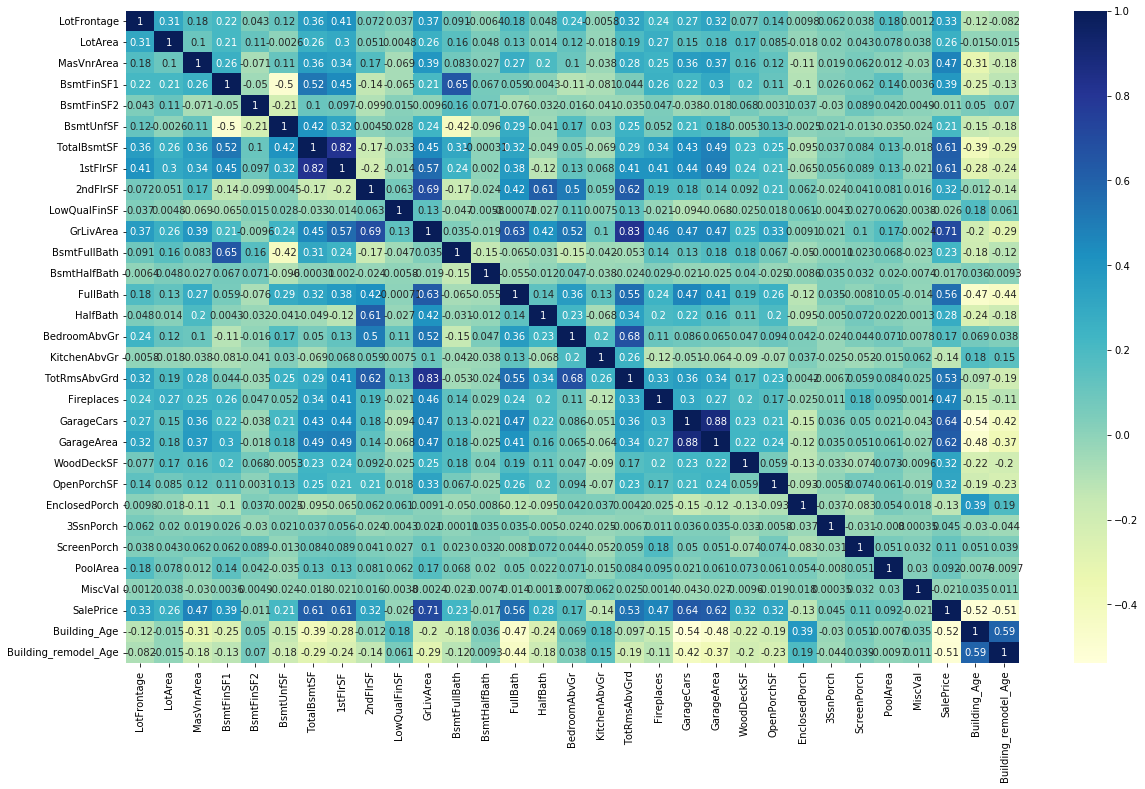

In [22]:
cor = numeric_cols.corr()
plt.figure(figsize = (20,12))
sns.heatmap(cor, cmap = 'YlGnBu', annot = True)
plt.show()

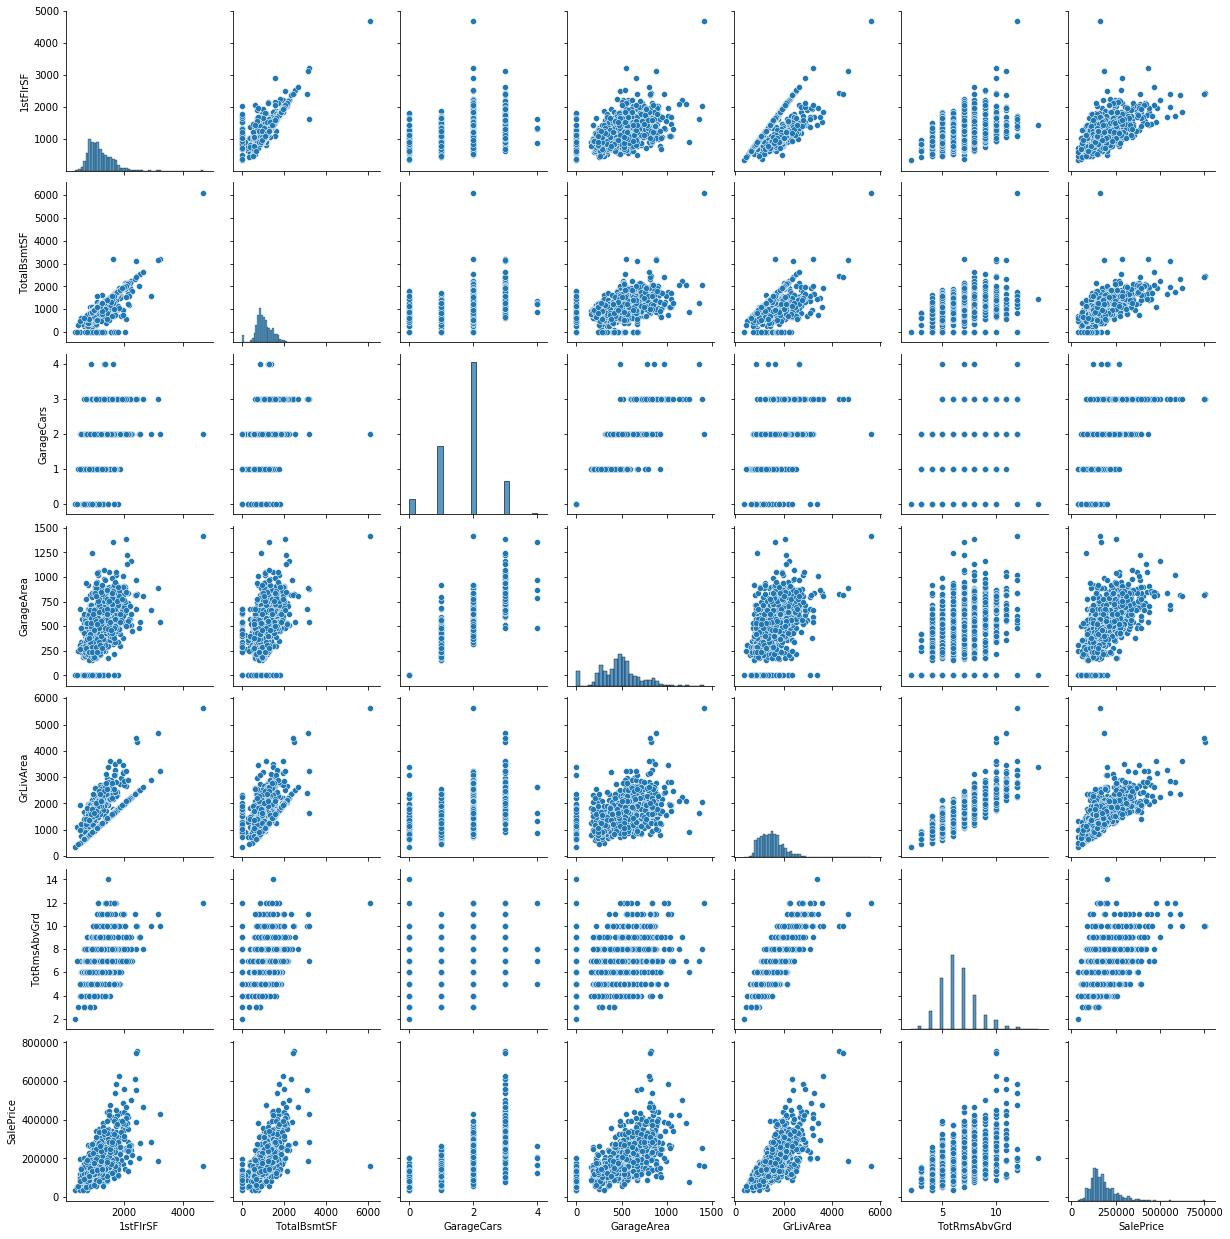

In [23]:
# Highly correlated variables are 1st Flr SF & Total Bsmt SF, Gr Liv Area & Tot Rms abv Grd, Garage Cars & Garage Area
# Sale Price is highly correlated with Garage cars, Garage Area,GrLiving Area, 1st Flr SF & Total BAsement SF. 

high_cor = df[['1stFlrSF','TotalBsmtSF','GarageCars','GarageArea','GrLivArea','TotRmsAbvGrd','SalePrice']]
sns.pairplot(high_cor)
plt.show()

In [24]:
# Dropping highly correlated fields
df = df.drop(['TotalBsmtSF','GarageArea','GrLivArea'], axis = 1)

In [25]:
numeric_cols = df.select_dtypes(include = ['float64', 'int64'])
numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LotFrontage           1460 non-null   float64
 1   LotArea               1460 non-null   int64  
 2   MasVnrArea            1460 non-null   int64  
 3   BsmtFinSF1            1460 non-null   int64  
 4   BsmtFinSF2            1460 non-null   int64  
 5   BsmtUnfSF             1460 non-null   int64  
 6   1stFlrSF              1460 non-null   int64  
 7   2ndFlrSF              1460 non-null   int64  
 8   LowQualFinSF          1460 non-null   int64  
 9   BsmtFullBath          1460 non-null   int64  
 10  BsmtHalfBath          1460 non-null   int64  
 11  FullBath              1460 non-null   int64  
 12  HalfBath              1460 non-null   int64  
 13  BedroomAbvGr          1460 non-null   int64  
 14  KitchenAbvGr          1460 non-null   int64  
 15  TotRmsAbvGrd         

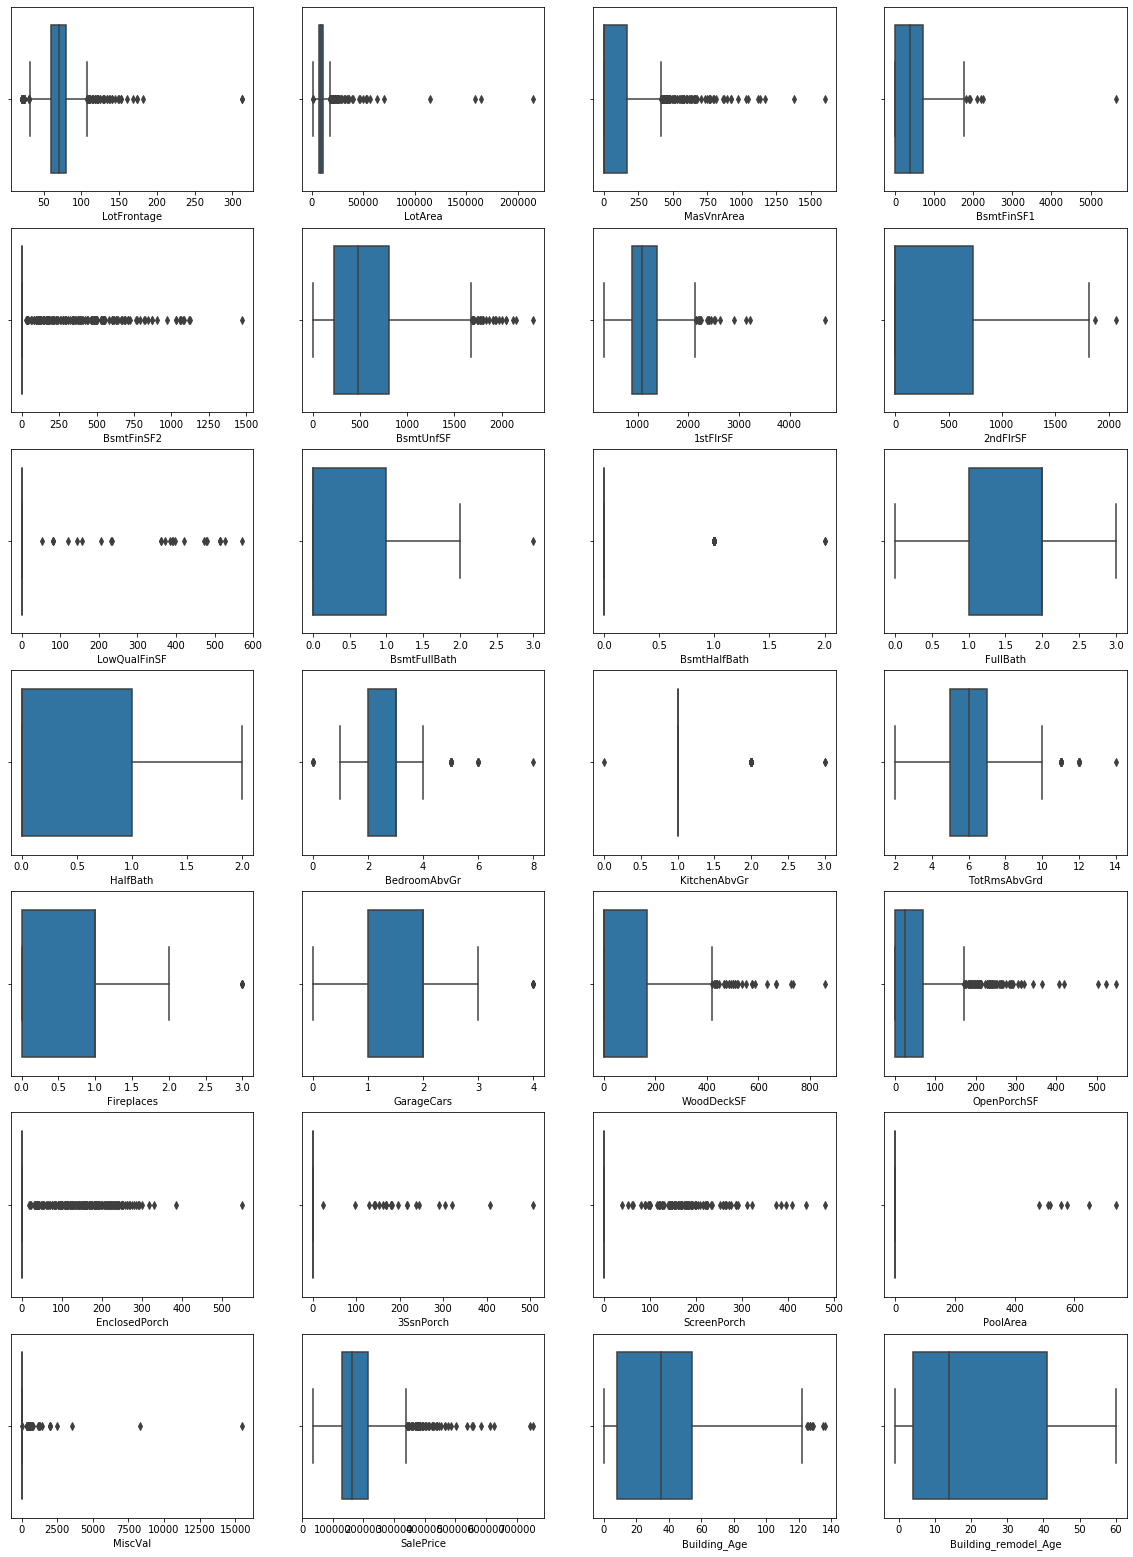

In [26]:
# Treating Outliers
plt.figure(figsize = (20,40))
for i in enumerate(numeric_cols):
    plt.subplot(10,4,i[0]+1)
    sns.boxplot(x = i[1], data = df)

In [27]:
df.drop(['PoolArea','BsmtFinSF2','LowQualFinSF','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal'],
        axis =1, inplace = True)

In [28]:
df.shape

(1460, 47)

In [29]:
# Treating outliers
Q1,Q3 = np.percentile(df['LotArea'],[10,90])
IQR = Q3-Q1
Upper_limit = Q3 + 1.5*IQR
Lower_limit = Q3 - 1.5*IQR
df = df[(df['LotArea'] <= Upper_limit) & (df['LotArea'] >= Lower_limit)]
df.shape

(1436, 47)

In [30]:
# Treating outliers
Q1,Q3 = np.percentile(df['1stFlrSF'],[10,90])
IQR = Q3-Q1
Upper_limit = Q3 + 1.5*IQR
Lower_limit = Q3 - 1.5*IQR
df = df[(df['1stFlrSF'] <= Upper_limit) & (df['1stFlrSF'] >= Lower_limit)]
df.shape

(1435, 47)

In [31]:
# Treating outliers
Q1,Q3 = np.percentile(df['BsmtFinSF1'],[10,90])
IQR = Q3-Q1
Upper_limit = Q3 + 1.5*IQR
Lower_limit = Q3 - 1.5*IQR
df = df[(df['BsmtFinSF1'] <= Upper_limit) & (df['BsmtFinSF1'] >= Lower_limit)]
df.shape

(1435, 47)

In [32]:
numeric_cols = df.select_dtypes(include = ['float64', 'int64'])
categorical_cols = df.select_dtypes(include = ['object'])

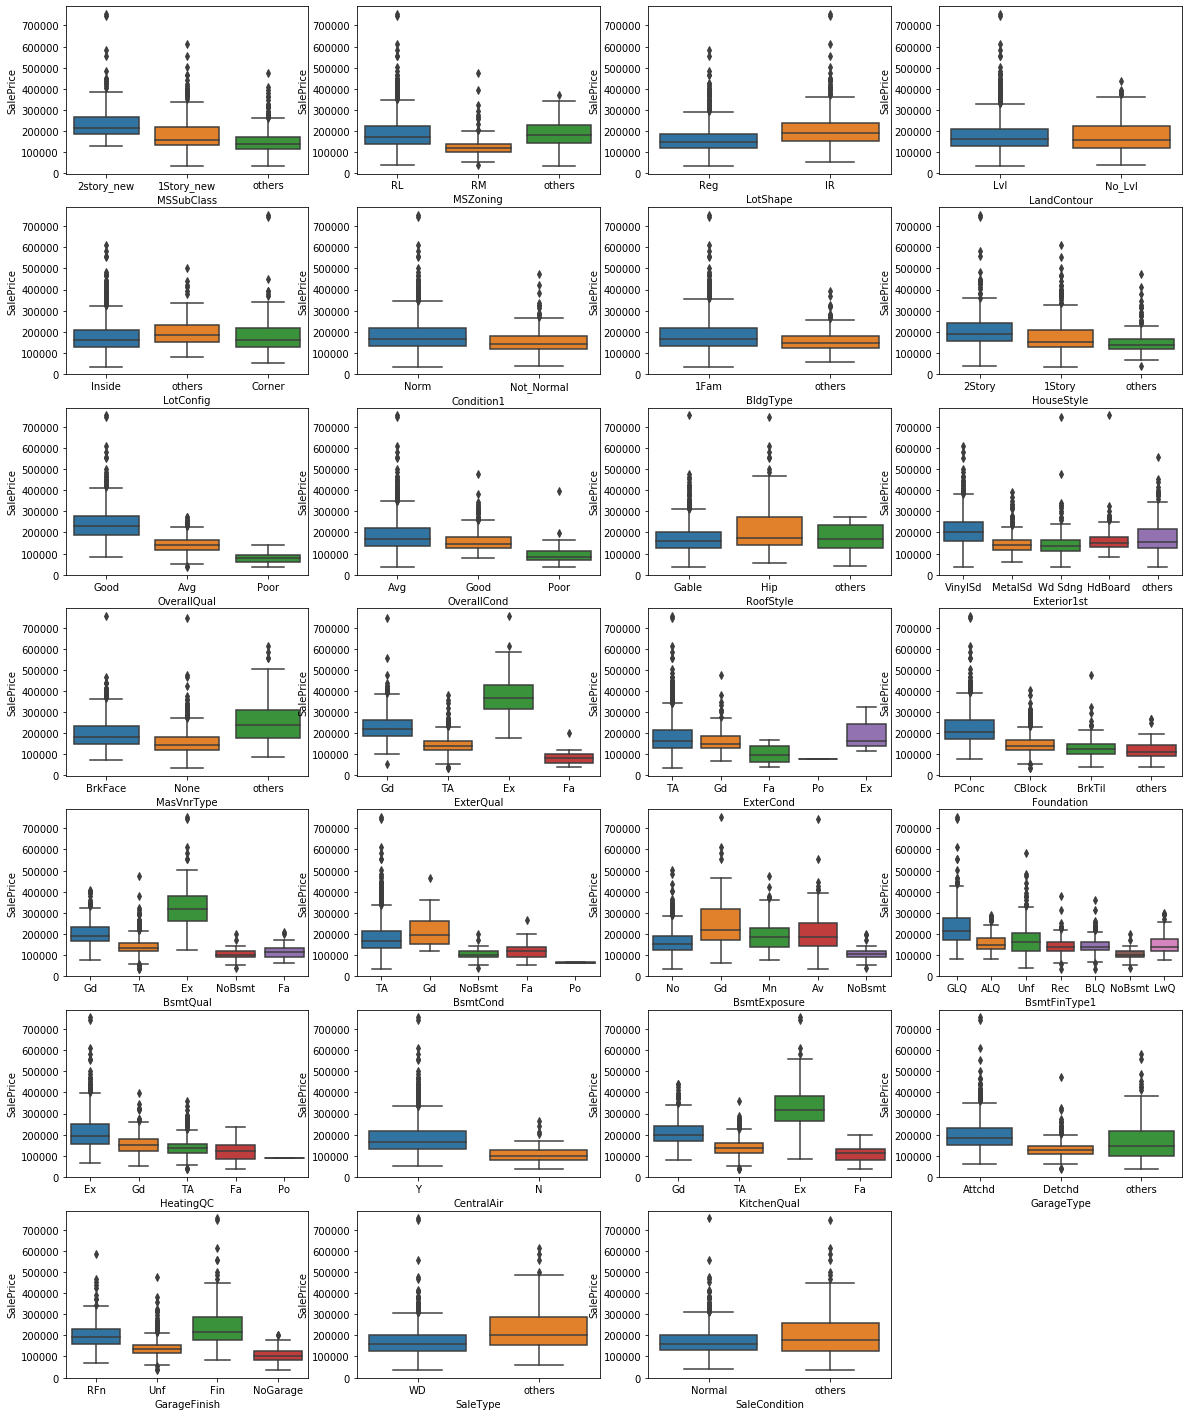

In [33]:
# Categorical Columns vs Sale Price

plt.figure(figsize = (20,40))
for i in enumerate(categorical_cols):
    plt.subplot(11,4,i[0]+1)
    sns.boxplot(x = i[1], y = 'SalePrice', data = df)

#### Data Preparation

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1435 non-null   object 
 1   MSZoning              1435 non-null   object 
 2   LotFrontage           1435 non-null   float64
 3   LotArea               1435 non-null   int64  
 4   LotShape              1435 non-null   object 
 5   LandContour           1435 non-null   object 
 6   LotConfig             1435 non-null   object 
 7   Condition1            1435 non-null   object 
 8   BldgType              1435 non-null   object 
 9   HouseStyle            1435 non-null   object 
 10  OverallQual           1435 non-null   object 
 11  OverallCond           1435 non-null   object 
 12  RoofStyle             1435 non-null   object 
 13  Exterior1st           1435 non-null   object 
 14  MasVnrType            1435 non-null   object 
 15  MasVnrArea           

In [35]:
# Creating Dummy Variables
df1 = pd.get_dummies(df, drop_first = True)

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1459
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotFrontage            1435 non-null   float64
 1   LotArea                1435 non-null   int64  
 2   MasVnrArea             1435 non-null   int64  
 3   BsmtFinSF1             1435 non-null   int64  
 4   BsmtUnfSF              1435 non-null   int64  
 5   1stFlrSF               1435 non-null   int64  
 6   2ndFlrSF               1435 non-null   int64  
 7   BsmtFullBath           1435 non-null   int64  
 8   BsmtHalfBath           1435 non-null   int64  
 9   FullBath               1435 non-null   int64  
 10  HalfBath               1435 non-null   int64  
 11  BedroomAbvGr           1435 non-null   int64  
 12  TotRmsAbvGrd           1435 non-null   int64  
 13  Fireplaces             1435 non-null   int64  
 14  GarageCars             1435 non-null   int64  
 15  Wood

In [37]:
cor1 = pd.DataFrame(df1.corr().abs().unstack().sort_values(ascending = False))
print(cor1[(cor1[0] < 1) & (cor1[0] > 0.7)])

                                                    0
BsmtExposure_NoBsmt   BsmtQual_NoBsmt        0.986401
BsmtQual_NoBsmt       BsmtExposure_NoBsmt    0.986401
BsmtExposure_NoBsmt   BsmtCond_NoBsmt        0.986401
                      BsmtFinType1_NoBsmt    0.986401
BsmtFinType1_NoBsmt   BsmtExposure_NoBsmt    0.986401
BsmtCond_NoBsmt       BsmtExposure_NoBsmt    0.986401
ExterQual_Gd          ExterQual_TA           0.908660
ExterQual_TA          ExterQual_Gd           0.908660
ExterCond_Gd          ExterCond_TA           0.892695
ExterCond_TA          ExterCond_Gd           0.892695
KitchenQual_Gd        KitchenQual_TA         0.825171
KitchenQual_TA        KitchenQual_Gd         0.825171
2ndFlrSF              HouseStyle_2Story      0.809503
HouseStyle_2Story     2ndFlrSF               0.809503
Foundation_CBlock     Foundation_PConc       0.779265
Foundation_PConc      Foundation_CBlock      0.779265
BsmtQual_Gd           BsmtQual_TA            0.767137
BsmtQual_TA           BsmtQu

In [38]:
# Dropping correlated variables > 0.7
df1 = df1.drop(['ExterQual_TA','ExterCond_TA','KitchenQual_TA','BsmtQual_TA','2ndFlrSF','BsmtExposure_NoBsmt'],axis = 1)

In [39]:
df1.shape

(1435, 81)

In [40]:
# Splittin train and test data

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df1, train_size = 0.7,test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(1004, 81)
(431, 81)


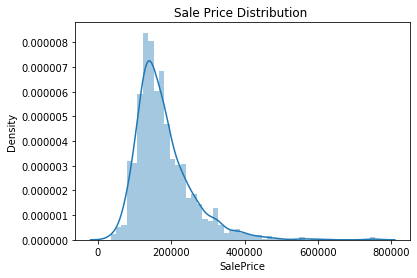

In [41]:
# Sale Price Distribution
plt.title('Sale Price Distribution ')
sns.distplot(df1['SalePrice'])
plt.show()

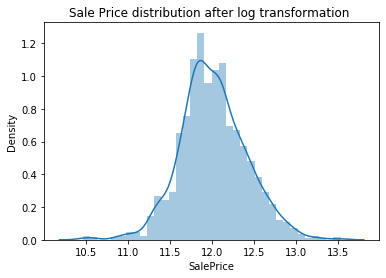

In [42]:
# Sale Price distribution after log transformation
plt.title('Sale Price distribution after log transformation ')
sns.distplot(np.log(df1['SalePrice']))
plt.show()

In [43]:
# Creating x & Y train & test

y_train = np.log(df_train.SalePrice)
x_train = df_train.drop("SalePrice",1)
y_test = np.log(df_test.SalePrice)
x_test = df_test.drop("SalePrice",1)

In [44]:
num_cols = x_train.select_dtypes(include = ['int64','float64']).columns
num_cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       '1stFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'Building_Age', 'Building_remodel_Age'],
      dtype='object')

In [45]:
# Scaling the train data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_train.describe()
x_test[num_cols] = scaler.transform(x_test[num_cols])
x_test.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,GarageType_Detchd,GarageType_others,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleType_others,SaleCondition_others
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,...,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,0.060369,0.016344,0.068920,0.018023,-0.001617,0.124785,-0.014861,0.009529,0.023027,0.020725,...,0.937355,0.032483,0.382831,0.257541,0.143852,0.062645,0.278422,0.389791,0.153132,0.190255
std,1.229773,1.044220,1.151625,1.020037,0.998715,1.141370,0.983454,1.042639,0.959151,1.037464,...,0.242605,0.177484,0.486642,0.437788,0.351347,0.242605,0.448743,0.488270,0.360533,0.392959
min,-2.481554,-2.155632,-0.581802,-1.007175,-1.288716,-2.304686,-0.812259,-0.238577,-2.827910,-0.762899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.480721,-0.541088,-0.581802,-1.007175,-0.776139,-0.766584,-0.812259,-0.238577,-1.010227,-0.762899,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.034876,-0.062277,-0.581802,-0.101921,-0.234143,-0.079957,-0.812259,-0.238577,0.807457,-0.762899,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.494044,0.541901,0.434990,0.545864,0.522842,0.871861,1.129427,-0.238577,0.807457,1.247470,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,12.499042,4.781489,6.170890,3.921168,3.997727,5.046096,3.071113,8.316101,2.625141,3.257840,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1004, 80)
(1004,)
(431, 80)
(431,)


#### Building Linear Regression

In [47]:
# Linear Regression without Regularisation

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
rfe = RFE(lm,20)
rfe=rfe.fit(x_train,y_train)
col=x_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', '1stFlrSF', 'GarageCars', 'Building_Age', 'MSZoning_RM',
       'BldgType_others', 'HouseStyle_2Story', 'HouseStyle_others',
       'OverallQual_Good', 'OverallQual_Poor', 'OverallCond_Good',
       'OverallCond_Poor', 'RoofStyle_others', 'Foundation_CBlock',
       'Foundation_others', 'BsmtCond_Gd', 'BsmtCond_TA', 'CentralAir_Y',
       'SaleType_others', 'SaleCondition_others'],
      dtype='object')

In [49]:
import statsmodels
import statsmodels.api as sm
x_train_new=x_train[col]
x_train_new = sm.add_constant(x_train_new)
lr=sm.OLS(y_train,x_train_new)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     302.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:33:48   Log-Likelihood:                 515.08
No. Observations:                1004   AIC:                            -988.2
Df Residuals:                     983   BIC:                            -885.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.7178      0.031    377.966      0.000      11.657      11.779
BsmtFinSF1               0.0530      0.005     10.251      0.000       0.043       0.063
1stFlrSF                 0.1745      0.007     26.390      0.000       0.162       0.187
GarageCars               0.0556      0.007      8.532      0.000       0.043       0.068
Building_Age            -0.0747      0.008     -9.550      0.000      -0.090      -0.059
MSZoning_RM             -0.0728      0.015     -4.702      0.000      -0.103      -0.042
BldgType_others         -0.0963      0.014     -6.930      0.000      -0.124      -0.069
HouseStyle_2Story        0.2860      0.013     21.663      0.000       0.260       0.312
HouseStyle_others        0.1328      0.013      9.874      0.000       0.106       0.159
OverallQual_Good         0.1426      0.014     10.317      0.000       0.115       0.170
OverallQual_Poor        -0.1439      0.043     -3.363      0.001      -0.228      -0.060
OverallCond_Good         0.1128      0.013      8.472      0.000       0.087       0.139
OverallCond_Poor        -0.1929      0.033     -5.774      0.000      -0.258      -0.127
RoofStyle_others         0.0585      0.034      1.729      0.084      -0.008       0.125
Foundation_CBlock       -0.0733      0.012     -6.363      0.000      -0.096      -0.051
Foundation_others       -0.1419      0.037     -3.834      0.000      -0.214      -0.069
BsmtCond_Gd              0.1075      0.033      3.249      0.001       0.043       0.172
BsmtCond_TA              0.0957      0.024      3.924      0.000       0.048       0.144
CentralAir_Y             0.0817      0.022      3.727      0.000       0.039       0.125
SaleType_others          0.0947      0.019      4.923      0.000       0.057       0.132
SaleCondition_others    -0.0729      0.016     -4.504      0.000      -0.105      -0.041
==============================================================================
Omnibus:                       73.216   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.581
Skew:                          -0.157   Prob(JB):                     4.89e-69
Kurtosis:                       5.724   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ridge Regression

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [51]:
# list of alphas to tune - if too high (underfitting), too low (overfitting)

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}
ridge = Ridge()

In [52]:
# Cross validation

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [53]:
print(model_cv.best_params_)

{'alpha': 10.0}


In [54]:
# Fitting Ridge model for alpha = 10
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)
print(ridge.coef_)

[ 1.54037895e-02  2.16725058e-02  2.35195828e-02  5.56058282e-02
  2.72164581e-02  7.95729258e-02  9.84316230e-03  6.05315339e-05
  3.44093783e-02  3.36839335e-02 -9.08244190e-04  3.00292258e-02
  3.03512470e-02  3.83208700e-02  9.98396326e-03  1.63856463e-02
 -5.19140747e-02 -2.27276234e-02 -3.84505404e-03 -1.06249518e-02
 -4.69268285e-02 -2.90486156e-02 -7.70486285e-03 -5.84185340e-03
 -6.97255920e-03 -2.96682156e-03 -3.29745405e-02 -3.62472860e-02
  1.04727615e-01  7.62257809e-02  1.02916541e-01 -9.73950940e-02
  8.76420298e-02 -1.42850185e-01  2.39162579e-02  3.31931312e-02
  2.73280278e-02 -3.00513347e-03  6.63250110e-03  3.15901118e-02
  3.26107123e-02  3.19595285e-02 -4.01508115e-02  3.16497702e-02
 -1.92715595e-02  7.17324466e-03  0.00000000e+00 -4.17531300e-02
  2.12863615e-02 -4.71144867e-02 -2.37690949e-02 -2.40938064e-02
 -1.54386905e-02  4.10598790e-02 -1.54386905e-02 -1.49699737e-02
  3.78464373e-02  3.67647318e-02  1.06288397e-02  4.58695932e-04
  1.18773207e-02  2.47487

In [55]:
y_pred_train = ridge.predict(x_train)
y_pred_test = ridge.predict(x_test)
metric2 = []
# R Square - Train
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

#R Square - Test
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

#RSS - Train
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

# RSS - Test
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

# MSE - Train
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

# MSE - Test
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)


0.8927721593292407
0.8785636828288063
16.140198043048233
8.976502609942273
0.016075894465187483
0.020827152227244253


In [56]:
ridge_df = pd.DataFrame({'Features':x_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by = 'Coefficient', ascending = False)

,Features,Coefficient
28,HouseStyle_2Story,0.1047
30,OverallQual_Good,0.1029
32,OverallCond_Good,0.0876
5,1stFlrSF,0.0796
29,HouseStyle_others,0.0762
...,...,...
16,Building_Age,-0.0519
79,SaleCondition_others,-0.0534
75,GarageFinish_NoGarage,-0.0618
31,OverallQual_Poor,-0.0974


### Lasso Regression

In [57]:
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [58]:
model_cv.best_params_

{'alpha': 0.001}

In [59]:
#Fitting lasso model for alpha = 0.001

alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
lasso.coef_

array([ 0.01367667,  0.02338209,  0.02028205,  0.06445946,  0.03022423,
        0.08202395,  0.01015155,  0.        ,  0.03099627,  0.03295366,
        0.        ,  0.02964609,  0.03163168,  0.03923981,  0.00972633,
        0.01623947, -0.05364861, -0.02329967,  0.        , -0.        ,
       -0.03844814, -0.0088844 , -0.00557612, -0.        , -0.00168304,
        0.        , -0.02922209, -0.04335322,  0.10481644,  0.06853226,
        0.11066231, -0.10327726,  0.09022373, -0.17578944,  0.01614833,
        0.        ,  0.01656474, -0.        ,  0.        ,  0.02136914,
        0.02097433,  0.01828048, -0.        ,  0.02154392, -0.        ,
        0.00058484,  0.        , -0.03260355,  0.02299157, -0.0440551 ,
       -0.        , -0.01848321, -0.        ,  0.03017111, -0.        ,
       -0.        ,  0.03364854,  0.02514485,  0.        , -0.        ,
        0.        ,  0.01626189,  0.0193653 , -0.        ,  0.        ,
       -0.00973681, -0.00592318, -0.01140386,  0.        , -0.03

In [61]:
y_pred_train = lasso.predict(x_train)
y_pred_test = lasso.predict(x_test)
metric3 = []

# R Square - Train
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

#R Square - Test
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

#RSS - Train
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

# RSS - Test
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

# MSE - Train
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

# MSE - Test
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8893293346426661
0.8813020394882761
16.658420474099792
8.774084863148856
0.016592052265039632
0.02035750548294398


In [62]:
lasso_df = pd.DataFrame({'Features':x_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by = 'Coefficient', ascending = False)

,Features,Coefficient
30,OverallQual_Good,0.1107
28,HouseStyle_2Story,0.1048
32,OverallCond_Good,0.0902
5,1stFlrSF,0.0820
29,HouseStyle_others,0.0685
...,...,...
79,SaleCondition_others,-0.0452
75,GarageFinish_NoGarage,-0.0521
16,Building_Age,-0.0536
31,OverallQual_Poor,-0.1033


In [63]:
# Creating metrics table

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric']  )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.892772,0.889329
1,R2 Score (Test),0.878564,0.881302
2,RSS (Train),16.140198,16.658420
3,RSS (Test),8.976503,8.774085
4,MSE (Train),0.126791,0.128810
5,MSE (Test),0.144316,0.142680


####  Summary:
    1. R2 Values - Train ( Ridge - 0.892; Lasso - 0.889)
       R2 Values - Test  ( Ridge - 0.878; Lasso - 0.881)
    2. Significant variables affecting the sale price are 
        HouseStyle (2Story), Overall Quality (Good), Overall Condition, 1stFloor SF & Garage details
    

#### Steps:
     1. The data is analaysed to understand the columns,rows and the values associated with it
     2. Unwanted columns which are not useful for analysis are identified and removed
     3. Missing values are checked and treated appropriately
     4. Outliers are checked and the replaced with the mean/ mode values as per the data
     5. Univariate and birvariate analysis are done
     6. The assosciation of target variable 'Salesprice'with other variables is analysed
     7. After data cleaning, train & test split made
     8. Scaling and trasformation done on the data
     9. Linear Regression model is built using RFE with R2 value of 0.86
     10. Ridge regression (alpha = 10) is developed and the r2 value is 0.892
     11. Lasso Regression (alpha = 0.001) is developed and the r2 value is 0.889
     12. The coefficents of the models are observed
 

#### Making the changes in alpha for Lasso

In [64]:
# Doubling the alpha 
alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(x_train, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
y_pred_train = lasso.predict(x_train)
y_pred_test = lasso.predict(x_test)
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

0.8795499614448392
0.876450003105707
18.1304357563477
9.132744597454417
0.018058202944569425
0.021189662639105378


#### MAking changes in alpha for Ridge

In [66]:
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(x_train, y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [67]:
y_pred_train = ridge.predict(x_train)
y_pred_test = ridge.predict(x_test)
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

0.8898852138781315
0.8784491008120097
16.574748165748645
8.984972446617055
0.01650871331249865
0.020846803820457206


In [68]:
ridge_df = pd.DataFrame({'Features':x_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by = 'Coefficient', ascending = False)

,Features,Coefficient
30,OverallQual_Good,0.0978
32,OverallCond_Good,0.0818
28,HouseStyle_2Story,0.0817
5,1stFlrSF,0.0754
29,HouseStyle_others,0.0631
...,...,...
79,SaleCondition_others,-0.0450
75,GarageFinish_NoGarage,-0.0492
16,Building_Age,-0.0500
31,OverallQual_Poor,-0.0758


In [69]:
lasso_df = pd.DataFrame({'Features':x_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by = 'Coefficient', ascending = False)

,Features,Coefficient
30,OverallQual_Good,0.1142
32,OverallCond_Good,0.0873
5,1stFlrSF,0.0774
28,HouseStyle_2Story,0.0770
3,BsmtFinSF1,0.0696
...,...,...
69,HeatingQC_TA,-0.0293
27,BldgType_others,-0.0374
16,Building_Age,-0.0515
31,OverallQual_Poor,-0.0522
